# Sample construction example - functionalized nanoparticle on amorphous carbon

This notebook uses ASE to construct a complex sample geometry. Steps:
1. Construct nanoparticle
2. Import and position substrate
3. Delete overlapping atoms
4. Add functional groups

### Acknowledgements
- Notebook from C Ophus et al. 
- ASE: https://wiki.fysik.dtu.dk/ase/gallery/gallery.html
- Amorphous carbon blocks: C. Ricolleau et al., Journal of Applied Physics  114, 213504 (2013). https://doi.org/10.1063/1.4831669
- Thiolate structure from Z Yang et al., Inorganic Chemistry 46, 2427 (2007). https://doi.org/10.1021/ic061242o

In [1]:
from abtem import *
from abtem.visualize import show_atoms

from ase.cluster.cubic import FaceCenteredCubic
from ase import Atoms
from ase.io import read
# from ase.io.extxyz import read_extxyz
# from ase.io.xyz import read_xyz
# from ase.build.rotate import minimize_rotation_and_translation
# from ase.build.attach import attach_randomly
# from ase.build.attach import attach

import numpy as np
import matplotlib.pyplot as plt

# 1 - Build a gold nanoparticle which contains a twin

A nanoparticle can be constructed by tiling atoms to form a crystal, and then truncating the structure at each desired surface.


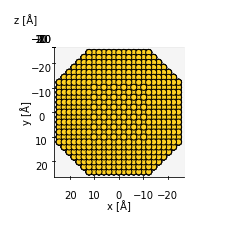

In [2]:
# Build a simple nanoparticle and plot the structure.

# Define atomic number, lattice constant
ID = 'Au'
a_lat = 4.08

# Define Wulff shape from facets and layers
facets = [(1, 0, 0),
          (1, 1, 0),
          (1, 1, 1)]
layers = [12, 18, 12]

# Construction and plotting
atoms_NP_00 = FaceCenteredCubic(ID, facets, layers, latticeconstant=a_lat)
show_atoms(atoms_NP_00,
           plane=[90, 90],
           scale_atoms=20.0);
# fig, ax = plt.subplots(1, 1, figsize=(8,8))
# show_atoms(atoms_NP, plane='xy', ax = ax);

If we want to insert a twin plane along a 111 close packed plane, we can add another termination plane at (1,1,1). We will also rotate the nanoparticle to have the new (1,1,1) plane along the beam direction.

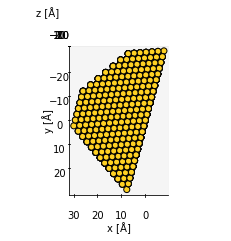

In [3]:
# Define Wulff shape from facets and layers
facets = [(1, 0, 0),
          (1, 1, 0),
          (1, 1, 1),
          (1, 1, 1)]
layers = [12, 18, 12, 0]

# Construction 
atoms_NP_01 = FaceCenteredCubic(ID, facets, layers, latticeconstant=a_lat)

# Rotation
atoms_NP_01.rotate(45, 'z')
atoms_NP_01.rotate(90-(180/np.pi)*np.arccos(-1/np.sqrt(3)), 'x')
atoms_NP_01.rotate(30, 'y')
atoms_NP_01.rotate(75, 'z')

# plotting
show_atoms(atoms_NP_01,
           plane=[90, 90],
           scale_atoms=20.0);

What does the other side of the twinned nanoparticle look like? 

First we need to flip the termination plane from (-1,1,1) to (1,-1,-1).

Next, we terminate at -1 rather than 0, to prevent any overlap.

Finally, we will rotate around the (-1,1,1) vector by 30 degrees to reverse the stacking.  This could also be accomplished with a mirror operation.

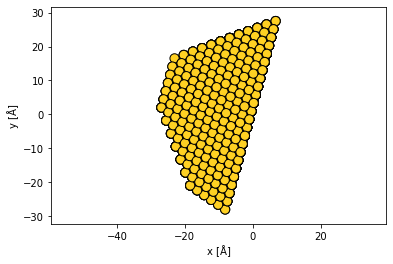

In [4]:
# Define Wulff shape from facets and layers
facets = [(1, 0, 0),
          (1, 1, 0),
          (1, 1, 1),
          (-1, -1, -1)]
layers = [12, 18, 12, -1]

# Construction
atoms_NP_02 = FaceCenteredCubic(ID, facets, layers, latticeconstant=a_lat)

# Rotation
atoms_NP_02.rotate(45, 'z')
atoms_NP_02.rotate(90-(180/np.pi)*np.arccos(-1/np.sqrt(3)), 'x')
atoms_NP_02.rotate(210, 'y')
atoms_NP_02.rotate(75, 'z')

# plotting
show_atoms(atoms_NP_02,
           plane='xy',
           scale_atoms=1.0);

Let's combine the two halves together, and rotate both to show the twin plane along the z axis.  We also need to shift the second half slightly to position the twin plane.

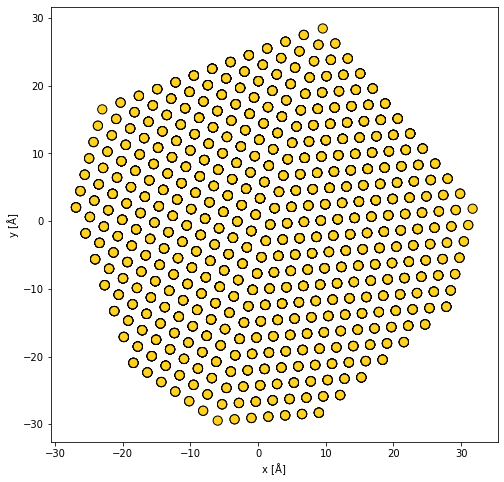

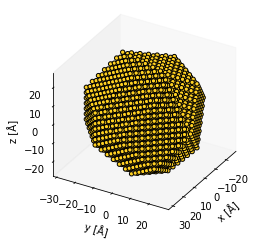

In [5]:
atoms_NP = atoms_NP_01.copy()
atoms_NP.translate((1.8,-0.5,0))
atoms_NP = atoms_NP + atoms_NP_02

# plotting
# show_atoms(atoms_NP,
#            plane=[90,90],
#            scale_atoms=10.0);
fig, ax = plt.subplots(1, 1, figsize=(8,8))
show_atoms(atoms_NP, plane='xy', ax = ax);

show_atoms(atoms_NP,
           plane=[30,30],
           scale_atoms=10.0);

# 2 - Add some functional groups to various positions on the surface.

We will import a thiolate structure, and then attach copies of it to various points on the NP.

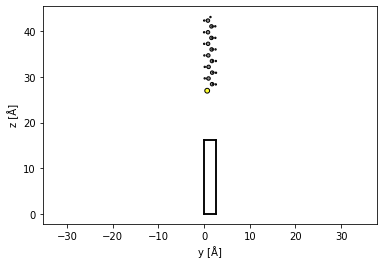

In [6]:
# Import structure, rotate the chain to have a vertical orientation, and then center.

# import
file_thiol = 'data/4306934_single_chain.xyz'
thiol = read(file_thiol)

# Rotate the structure
thiol.rotate(206, 'y')
thiol.rotate(55, 'x')

# Center the structure
thiol.center(axis=(0,1,2), vacuum=0)

# More sulphur atom (binding cite) to be just above origin
thiol.translate((0,0,27))

# Plot the structure
show_atoms(thiol, plane='yz');

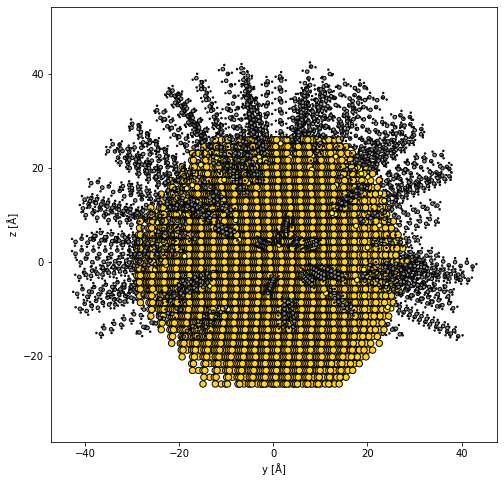

In [7]:
# Stick a bunch of thiols to random locations on the NP, plot the results

num_thiols = 200

# Set random seed - doesn't work currently?
# rand_seed = 12345
# np.random.seed(rand_seed)

atoms_NP_func = atoms_NP.copy()
for a0 in range(num_thiols):
    thiol_add = thiol.copy()
    
    # Rotate to a random angle
    theta = np.arccos(np.random.uniform(low=-0.4, high=1.0))
    phi = np.random.uniform(low=0.0, high=2*np.pi)
    thiol_add.rotate(theta * 180/np.pi, 'x')                  
    thiol_add.rotate(phi * 180/np.pi, 'z')                  
                      
    # Merge
    atoms_NP_func = atoms_NP_func + thiol_add

# min_dist = 25

# # [Z_rotate X_rotate Z_rotate dx dy dz]
# thiol_rotate_shift = np.array([
#     [0, 0, 0, 0, 0, 25],
#     [0, 0, 0, 5, -6, 25],
#     [0, 0, 0, 3, 4, 25],
#     [0, 0, 0, -4, 7, 25],
#     [0, 0, 0, 9, 1, 25],
#     [0, 0, 0, -4, -4, 25],
#     [0, 0, 0, -8, 6, 25],
#     [0, 0, 0, -11, -2, 25],
#     ])

# atoms_NP_func = atoms_NP.copy()
# for a0 in range(thiol_rotate_shift.shape[0]):
#     thiol_add = thiol.copy()

    #     thiol.rotate(thiol_rotate_shift[a0,0], 'z')
    #     thiol.rotate(thiol_rotate_shift[a0,1], 'x')
    #     thiol.rotate(thiol_rotate_shift[a0,2], 'z')
    #     thiol_add.translate(thiol_rotate_shift[a0,3:6])

    #     # minimize_rotation_and_translation(atoms_NP_func, thiol_add)
    #     # attach(atoms_NP_func, thiol_add, min_dist)

    #     atoms_NP_func = atoms_NP_func + thiol_add

# plot the result
fig, ax = plt.subplots(1, 1, figsize=(8,8))
show_atoms(atoms_NP_func, plane='yz', ax = ax);

# 3 - Import amorphous carbon structure

C. Ricolleau have provided some pre-calculated blocks of amorphous carbon.  We will import and apply 2x2 tiling to a block of 50 x 50 x 50 Angstrom block of amorphous carbon.

In [8]:
# file_amor_carbon = 'data/5x5x5nm3_config1.xyz'
file_amor_carbon = 'data/5x5x5_export.xyz'
amor_carbon = read(file_amor_carbon)

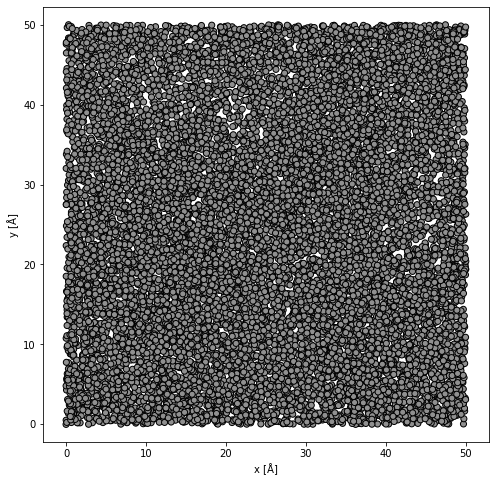

In [9]:
# plot the initial block of amorphous carbon
fig, ax = plt.subplots(1, 1, figsize=(8,8))
show_atoms(amor_carbon, plane='xy', ax=ax);

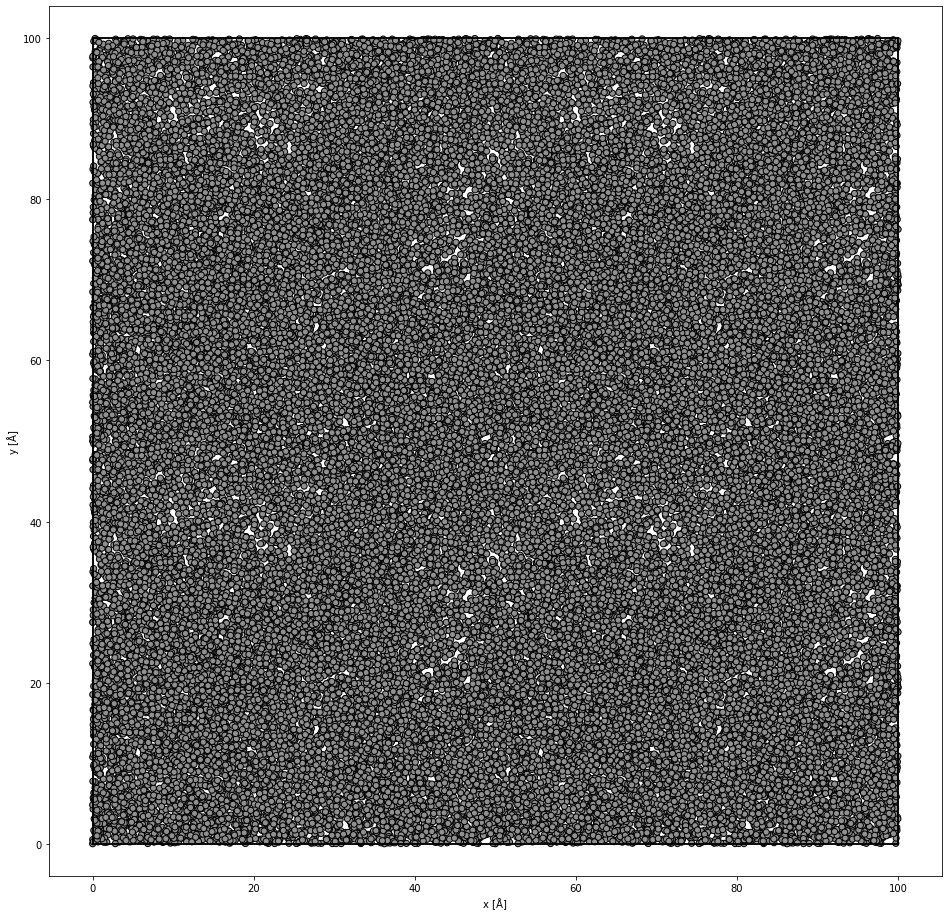

In [10]:
# Now tile cell by 2x2 in the x-y plane
amor_carbon_tile = amor_carbon.copy()
amor_carbon_tile.center(axis=(0,1,2), vacuum=0)
amor_carbon_tile *= (2,2,1)

# Plot the result
fig, ax = plt.subplots(1, 1, figsize=(16,16))
show_atoms(amor_carbon_tile, plane='xy', ax=ax);

# 4 - Add nanoparticle to the substrate

We will combine the two above structures, delete overlapping atoms, and set the unit cell dimensions.

In [11]:
# Deletion radius
radius_del_2 = 3**2  

# Move the substrate to the correct position relative to the NP, then combine
structure = amor_carbon_tile.copy()
structure.translate((-50,-50,-68))

# Delete any atoms in the substrate which overlap with the NP
remove = np.zeros(structure.positions.shape[0],dtype='bool')
for a0 in range(structure.positions.shape[0]):
# for a0 in range(10):
    if np.min(np.sum((atoms_NP.positions - structure.positions[a0,:])**2,axis=1)) < radius_del_2:
        remove[a0] = True
del structure[remove]

# Combine
structure += atoms_NP_func

# Re-center unit cell, which will implicitly add vacuum to z axis
structure.center(axis=(0,1,2), vacuum=0)

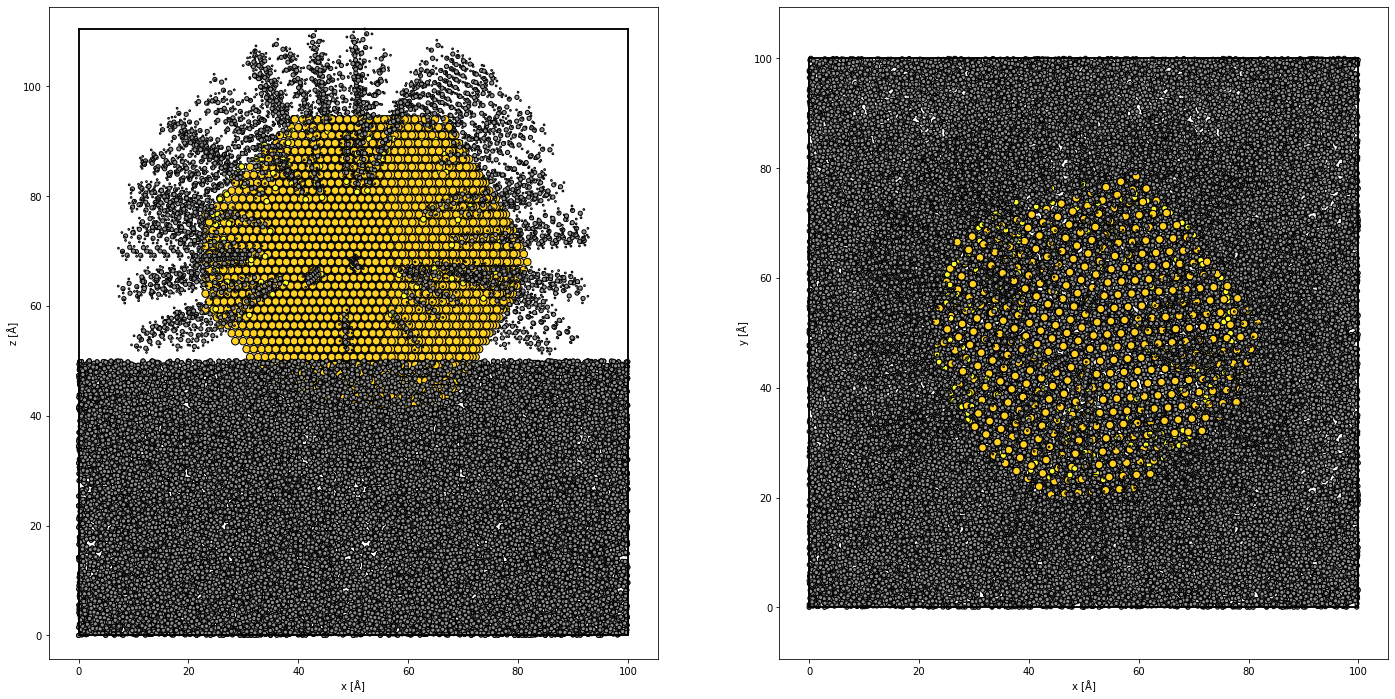

In [12]:
# plot the resulting structure
fig, ax = plt.subplots(1, 2, figsize=(24,12))
show_atoms(structure, plane='xz', ax=ax[0]);
show_atoms(structure, plane='xy', ax=ax[1]);